In [2]:
# example of CountVectorizer() implementation
# just for my reference

from sklearn.feature_extraction.text import CountVectorizer

# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]

# create the transform
vectorizer = CountVectorizer()

# tokenize and build vocab
vectorizer.fit(text)

# summarize
print(f'Vectorized Vocabulary:\t\t {vectorizer.vocabulary_}\n')

# encode document
vector = vectorizer.transform(text)

# summarize encoded vector
print(f'Shape of encoded document:\t {vector.shape}\n')
print(f'Dataype of encoded document:\t {type(vector)}\n')
print(f'Word counts for each word\n' +
      f'in vocabulary:\t\t\t {vector.toarray()}\n')

Vectorized Vocabulary:		 {'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}

Shape of encoded document:	 (1, 8)

Dataype of encoded document:	 <class 'scipy.sparse.csr.csr_matrix'>

Word counts for each word
in vocabulary:			 [[1 1 1 1 1 1 1 2]]



In [3]:
# example of TD-IDF Implementation

from sklearn.feature_extraction.text import TfidfVectorizer

# list of text documents
text = ["The quick brown fox jumped over the lazy dog.",
		"The dog.",
		"The fox"]

# create the transform
vectorizer = TfidfVectorizer()

# tokenize and build vocab
vectorizer.fit(text)

# summarize
print(f'Encoded vocabulary (vectorized): {vectorizer.vocabulary_}')
print(f'Inverse document frequencies: {vectorizer.idf_}\n')

# encode document
vector = vectorizer.transform([text[0]])

# summarize encoded vector
print(vector.shape)
print(vector.toarray())

Encoded vocabulary (vectorized): {'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
Inverse document frequencies: [1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]

(1, 8)
[[0.36388646 0.27674503 0.27674503 0.36388646 0.36388646 0.36388646
  0.36388646 0.42983441]]


In [4]:
import numpy as np  
import pandas as pd
import random  
import string
import bs4 as bs  
import urllib.request  
import re
from collections import Counter

import tweepy
import TwitterCredentials as keys

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer

from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vpathalam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#type(new_tweets)

In [9]:
# MY REFERENCE

import tweepy
import TwitterCredentials as keys
import pandas as pd

auth = tweepy.OAuthHandler(keys.consumer_API_key, keys.consumer_API_secret_key)
auth.set_access_token(keys.access_token, keys.access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

user_ID = 'wsj'

# extract the 200 most recent tweets from the offical WSJ account
# the full tweet will be loaded
tweets = api.user_timeline(screen_name = user_ID, count = 200, tweet_mode = 'extended')


In [10]:
# show the 3 most recent tweets which we extracted
for info in tweets[:3]:
    print('ID: {}'.format(info.id))
    print(info.created_at)
    print(info.full_text)
    print('\n')

ID: 1336369966577225728
2020-12-08 18:00:03
Theater owners fear that releasing movies simultaneously on HBO Max and the big screen will drive a stake through their business https://t.co/OZsdTQUIPE


ID: 1336364807998631937
2020-12-08 17:39:33
Carrie Lam, Hong Kong’s chief executive, speaks with @WSJAsia editor Andrew Dowell about how businesses may be rethinking their presence in the global hub https://t.co/3t1WY7wsXE


ID: 1336362435582844928
2020-12-08 17:30:07
The popularity of chess boomed because of the pandemic and a hit Netflix show. So did cheating. https://t.co/8mlg5PD65E




In [11]:
# initialize an empty list to hold all the requested tweets 
all_tweets = []

# add the 200 requested tweets to our empty list
all_tweets.extend(tweets)

# save the ID of the oldest tweet (last tweet) which we retrieved
oldest_id = tweets[-1].id
oldest_id

1335577232463462402

In [12]:
# continuously retrieve WSJ tweets until there are no more left
while True:
    # print the max_id that we are starting with
    print(f'Retrieving tweets published before the tweet with ID {oldest_id}')
    tweets = api.user_timeline(screen_name = user_ID, count = 200, # 200 is the most that can be retrieved at once
                               max_id = oldest_id - 1, # only retrieves tweets that are older than or equal to this ID
                               tweet_mode = 'extended')
    # breaks the loop once we have retrieved all tweets possible
    if len(tweets) == 0:
        break
    # saves the ID of the oldest (last tweet) retrieved in each loop
    oldest_id = tweets[-1].id
    # before completing a loop, saves the 200 tweets that we retrieved to our established list of tweets
    all_tweets.extend(tweets)
    
    print(f'....{len(all_tweets)} tweets retrieved so far')

Retrieving tweets published before the tweet with ID 1335577232463462402
....400 tweets retrieved so far
Retrieving tweets published before the tweet with ID 1334709086714286081
....600 tweets retrieved so far
Retrieving tweets published before the tweet with ID 1333916338818060288
....800 tweets retrieved so far
Retrieving tweets published before the tweet with ID 1333104713445859333
....1000 tweets retrieved so far
Retrieving tweets published before the tweet with ID 1332153440634593280
....1200 tweets retrieved so far
Retrieving tweets published before the tweet with ID 1331356950978830339
....1400 tweets retrieved so far
Retrieving tweets published before the tweet with ID 1330571822316859394
....1600 tweets retrieved so far
Retrieving tweets published before the tweet with ID 1329726224264990728
....1800 tweets retrieved so far
Retrieving tweets published before the tweet with ID 1328895761959047168
....2000 tweets retrieved so far
Retrieving tweets published before the tweet with

In [13]:
type(all_tweets)

list

In [14]:
pd.DataFrame(all_tweets)

,0
0,Status(_api=<tweepy.api.API object at 0x7fda3e...
1,Status(_api=<tweepy.api.API object at 0x7fda3e...
2,Status(_api=<tweepy.api.API object at 0x7fda3e...
3,Status(_api=<tweepy.api.API object at 0x7fda3e...
4,Status(_api=<tweepy.api.API object at 0x7fda3e...
...,...
3217,Status(_api=<tweepy.api.API object at 0x7fda3e...
3218,Status(_api=<tweepy.api.API object at 0x7fda3e...
3219,Status(_api=<tweepy.api.API object at 0x7fda3e...
3220,Status(_api=<tweepy.api.API object at 0x7fda3e...


In [15]:
import tweepy
import TwitterCredentials as keys
import pandas as pd

auth = tweepy.OAuthHandler(keys.consumer_API_key, keys.consumer_API_secret_key)
auth.set_access_token(keys.access_token, keys.access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

screen_name = "wsj"
#initialize a list to hold all the tweepy Tweets
alltweets = []  
    
#make initial request for most recent tweets (200 is the maximum allowed count)
new_tweets = api.user_timeline(screen_name = screen_name, count=200) #, tweet_mode = 'extended')
    
#save most recent tweets
# alltweets.extend(new_tweets)
    
#save the id of the oldest tweet less one
oldest = alltweets[-1].id - 1

#keep grabbing tweets until there are no tweets left to grab
while len(new_tweets) > 0:
    print(f"getting tweets before {oldest}")
        
    #all subsiquent requests use the max_id param to prevent duplicates
    new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest) #, tweet_mode = 'extended')
        
    # save most recent tweets
    alltweets.extend(new_tweets)
        
    #update the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
        
    print(f"...{len(alltweets)} tweets downloaded so far")





#cursor objects for each news source
#trump = api.user_timeline, screen_name='realDonaldTrump', tweet_mode='extended'

#define empty lists to hold each tweet
#trumplist = []

#store each tweet in the cursor object in the corresponding list
#for tweet in trump.items(800):
#    trumplist.append(tweet)
    
#store data as a data frame
#df = pd.DataFrame({"realDonaldTrump": trumplist})

IndexError: list index out of range

In [16]:
df = pd.DataFrame({"realDonaldTrump": all_tweets})
df

,realDonaldTrump
0,Status(_api=<tweepy.api.API object at 0x7fda3e...
1,Status(_api=<tweepy.api.API object at 0x7fda3e...
2,Status(_api=<tweepy.api.API object at 0x7fda3e...
3,Status(_api=<tweepy.api.API object at 0x7fda3e...
4,Status(_api=<tweepy.api.API object at 0x7fda3e...
...,...
3217,Status(_api=<tweepy.api.API object at 0x7fda3e...
3218,Status(_api=<tweepy.api.API object at 0x7fda3e...
3219,Status(_api=<tweepy.api.API object at 0x7fda3e...
3220,Status(_api=<tweepy.api.API object at 0x7fda3e...


In [17]:
### DELETE

import numpy as np  
import random  
import string
import bs4 as bs  
import urllib.request  
import re
from collections import Counter
 

In [18]:
#function to convert the tweepy object to text
def totext(tweet):
    return tweet.full_text

#define new data frame to hold texts of tweets
dfnew = pd.DataFrame({"realDonaldTrump": []})

#map above function to each column in df
dfnew["realDonaldTrump"] = df["realDonaldTrump"].map(totext)

In [19]:
dfnew

,realDonaldTrump
0,Theater owners fear that releasing movies simu...
1,"Carrie Lam, Hong Kong’s chief executive, speak..."
2,The popularity of chess boomed because of the ...
3,China is pushing alternative theories about th...
4,"Darren Walker, the president of the Ford Found..."
...,...
3217,Some surveys got the results wrong in 2016—esp...
3218,The U.S. Air Force recently bought dozens of C...
3219,Some surveys got the results wrong in 2016—esp...
3220,At least one attacker killed three people and ...


In [20]:
dfnew.iloc[0]

realDonaldTrump    Theater owners fear that releasing movies simu...
Name: 0, dtype: object

In [21]:
# set the corpus as an empty list 
tweet_corpus = []

# iterate through each row of the DF (each tweet)
for i in range(len(dfnew)):
    # add each tweet's text body to the corpus
    tweet_corpus.append(dfnew.loc[i, 'realDonaldTrump'])
    
print(tweet_corpus)

['Theater owners fear that releasing movies simultaneously on HBO Max and the big screen will drive a stake through their business https://t.co/OZsdTQUIPE', 'Carrie Lam, Hong Kong’s chief executive, speaks with @WSJAsia editor Andrew Dowell about how businesses may be rethinking their presence in the global hub https://t.co/3t1WY7wsXE', 'The popularity of chess boomed because of the pandemic and a hit Netflix show. So did cheating. https://t.co/8mlg5PD65E', 'China is pushing alternative theories about the source of the coronavirus, muddying the waters as the World Health Organization prepares to launch an investigation into the origins of the Covid-19 pandemic https://t.co/5d4dNh8IiF', 'Darren Walker, the president of the Ford Foundation, discusses how he uses vocation and resources to be a force of social change #WSJWhatsNow https://t.co/iOWxiMcEAF', 'A sky-high penthouse on Manhattan’s Billionaire’s Row has gone into contract to sell for more than $50 million, one of the priciest apa

In [22]:
# see what the first tweet looks like
print(tweet_corpus[0])

Theater owners fear that releasing movies simultaneously on HBO Max and the big screen will drive a stake through their business https://t.co/OZsdTQUIPE


In [23]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import string
import re

relevant_corpus = set()

# define the key terms that we will filter tweets by 
all_topics = ["job", "economy", "trade", "market", "stock", "DJIA", "NASDAQ", "price", "jobs", "employed", 
              "unemployed", "employment", "unemployment", "stock exchange", "bull", "bear", "market", 
              "new york stock exchange", "shares", "financials", "taxes", "companies", "tax", "economic"]

for i in range(len(tweet_corpus)):
    #print(type(tweet_corpus[i]))
    #print(tweet_corpus[i])
    tweet_corpus[i] = re.sub(r'https:\S+', '', tweet_corpus[i])
    tweet_corpus[i] = re.sub(r"From @\S+", "", tweet_corpus[i])
    tweet_corpus[i] = re.sub(r"@\S+", "", tweet_corpus[i])
    tweet_corpus[i] = re.sub(r"#\S+", "", tweet_corpus[i])
    tweet_corpus[i] = tweet_corpus[i].lower()
    tweet_corpus[i] = re.sub(r'\s+',' ',tweet_corpus[i])
    #corpus[i] = re.sub(r'\W',' ',corpus[i])
    tweet_corpus[i] = re.sub(r'\w*\d\w*', '', tweet_corpus[i]).strip()        
    for topic in all_topics:
        if topic in tweet_corpus[i]:
            relevant_corpus.add(tweet_corpus[i])
print(len(relevant_corpus))
relevant_corpus

460


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vpathalam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'-hour workweeks and surprise days off are some of the solutions companies are experimenting with, as many remote employees report feeling depressed, fed up and wary of what’s next',
 'a bankruptcy judge approved an $. billion settlement between purdue pharma and the justice department that requires the drugmaker to plead guilty to three felonies over its marketing and distribution of oxycontin',
 'a biopharmaceutical company founded by now-convicted drug executive martin shkreli will trade under a new name starting thursday',
 'a chinese state-owned bank is stopping a digital bond sale that was drawing scrutiny over the bank’s role and the way investors could trade the securities',
 'a contemporary corona del mar home with panoramic views of the pacific ocean and its own japanese zen garden has hit the market for $ million',
 'a dish network subsidiary will pay $ million in penalties related to alleged telemarketing violations. the justice department said the settlement is the larges

In [24]:
### DELETE

def tokenize(corpus):
    '''
        Function: tokenize
        Parameter: a corpus of different texts (tweets) (string)
        Returns: a list of unigram tokens derived from the given text
        Does: creates unigram tokens from the body of each tweet in the given corpus.
    '''
    from nltk.tokenize import TweetTokenizer
    new_corpus = []
    for tweet in corpus:
        tokenizer = TweetTokenizer()
        tweet = tokenizer.tokenize(tweet) 
        # tweet = nltk.word_tokenize(tweet)
        #corpus[idx] = tweet
        for token in tweet:
            new_corpus.append(token)
    return new_corpus

In [25]:
tokenize(tweet_corpus)

['theater',
 'owners',
 'fear',
 'that',
 'releasing',
 'movies',
 'simultaneously',
 'on',
 'hbo',
 'max',
 'and',
 'the',
 'big',
 'screen',
 'will',
 'drive',
 'a',
 'stake',
 'through',
 'their',
 'business',
 'carrie',
 'lam',
 ',',
 'hong',
 'kong',
 '’',
 's',
 'chief',
 'executive',
 ',',
 'speaks',
 'with',
 'editor',
 'andrew',
 'dowell',
 'about',
 'how',
 'businesses',
 'may',
 'be',
 'rethinking',
 'their',
 'presence',
 'in',
 'the',
 'global',
 'hub',
 'the',
 'popularity',
 'of',
 'chess',
 'boomed',
 'because',
 'of',
 'the',
 'pandemic',
 'and',
 'a',
 'hit',
 'netflix',
 'show',
 '.',
 'so',
 'did',
 'cheating',
 '.',
 'china',
 'is',
 'pushing',
 'alternative',
 'theories',
 'about',
 'the',
 'source',
 'of',
 'the',
 'coronavirus',
 ',',
 'muddying',
 'the',
 'waters',
 'as',
 'the',
 'world',
 'health',
 'organization',
 'prepares',
 'to',
 'launch',
 'an',
 'investigation',
 'into',
 'the',
 'origins',
 'of',
 'the',
 'covid',
 '-',
 'pandemic',
 'darren',
 'walk

In [26]:
tokenize(relevant_corpus)

['airbnb',
 'plans',
 'to',
 'boost',
 'the',
 'proposed',
 'price',
 'range',
 'of',
 'its',
 'initial',
 'public',
 'offering',
 ',',
 'the',
 'latest',
 'sign',
 'that',
 'the',
 'red-hot',
 'ipo',
 'market',
 'is',
 'ending',
 'the',
 'year',
 'on',
 'a',
 'high',
 'note',
 'fred',
 'vanvleet',
 'did',
 'not',
 'hear',
 'his',
 'name',
 'called',
 'on',
 'his',
 'nba',
 'draft',
 'night',
 '.',
 'now',
 'he',
 '’',
 's',
 'perhaps',
 'the',
 'most',
 'coveted',
 'free',
 'agent',
 'on',
 'the',
 'market',
 '.',
 'the',
 'race',
 'to',
 'vaccinate',
 'the',
 'world',
 'against',
 'covid',
 '-',
 'intensifies',
 ',',
 'with',
 'governments',
 'scrambling',
 'to',
 'secure',
 'the',
 'small',
 'number',
 'of',
 'doses',
 'becoming',
 'available',
 'from',
 'western',
 'drug',
 'companies',
 'this',
 'year',
 '’',
 's',
 'thanksgiving',
 'celebrations',
 'are',
 'shaping',
 'up',
 'to',
 'be',
 'a',
 'little',
 'more',
 'pricey',
 '—',
 'and',
 'a',
 'lot',
 'smaller',
 'than',
 'usual

In [27]:
len(tokenize(relevant_corpus))

13191

In [28]:
print(len(relevant_corpus))

460


In [51]:
# custom function that tokenizes our corpus of selected tweets
def tokenize(corpus):
    '''
        Function: tokenize
        Parameters: a corpus of text from tweets (set of strings)
        Returns: a list of tokens from the given corpus (list of strings)
        Does: tokenizes the text from the given corpus, meaning that it separates every word into its own string
    '''
    new_corpus = []
    for tweet in corpus:
        tweet = tweet.split( )
        for token in tweet:
            new_corpus.append(token)
    return new_corpus

In [52]:
# just to test the function
tokenize(relevant_corpus)

['whether',
 'they',
 'made',
 'up',
 'their',
 'minds',
 'recently',
 'or',
 'saw',
 'their',
 'choices',
 'cemented',
 'by',
 'the',
 'events',
 'of',
 ',',
 'voters',
 'in',
 'key',
 'counties',
 'across',
 'battleground',
 'states',
 'cited',
 'the',
 'economy',
 'and',
 'the',
 'coronavirus',
 'among',
 'the',
 'things',
 'they',
 'cared',
 'most',
 'about',
 'moving',
 'companies',
 'have',
 'been',
 'asked',
 'to',
 'pack',
 'up',
 'and',
 'transport',
 'some',
 'highly',
 'personal',
 'and',
 'unforgettably',
 'strange',
 'objects.',
 'professional',
 'movers',
 'share',
 'their',
 'stories.',
 'enrollment',
 'tumbled',
 'this',
 'fall',
 'at',
 'community',
 'colleges,',
 'flipping',
 'a',
 'longstanding',
 'trend',
 'in',
 'which',
 'people',
 'flock',
 'to',
 'school',
 'when',
 'the',
 'economy',
 'weakens',
 'and',
 'raising',
 'concerns',
 'about',
 'the',
 'schools’',
 'financial',
 'outlook',
 'u.s.',
 'stocks',
 'are',
 'poised',
 'to',
 'extend',
 'their',
 'sharpest'

In [91]:
# NEED TO UPDATE DESCRIPTION

import nltk
import string

# custom function that tokenizes our corpus of selected tweets using the NLTK library
def nltk_tokenize(corpus):
    '''
        Function: nltk_tokenize
        Parameters: a corpus of text from tweets (set of strings)
        Returns: a list of tokens from the given corpus (list of strings)
        Does: tokenizes the text from the given corpus, meaning that it separates every word into its own string
    '''
    stems = []
    for tweet in corpus:
        #print(tweet)
        tokens = nltk.word_tokenize(tweet)
        #print(tokens)
        for item in tokens:
            stems.append(PorterStemmer().stem(item))
            #print(stems)
        #print(stems)
        #print('\n')
    return(stems)

In [92]:
nltk_tokenize(relevant_corpus)

['whether',
 'they',
 'made',
 'up',
 'their',
 'mind',
 'recent',
 'or',
 'saw',
 'their',
 'choic',
 'cement',
 'by',
 'the',
 'event',
 'of',
 ',',
 'voter',
 'in',
 'key',
 'counti',
 'across',
 'battleground',
 'state',
 'cite',
 'the',
 'economi',
 'and',
 'the',
 'coronaviru',
 'among',
 'the',
 'thing',
 'they',
 'care',
 'most',
 'about',
 'move',
 'compani',
 'have',
 'been',
 'ask',
 'to',
 'pack',
 'up',
 'and',
 'transport',
 'some',
 'highli',
 'person',
 'and',
 'unforgett',
 'strang',
 'object',
 '.',
 'profession',
 'mover',
 'share',
 'their',
 'stori',
 '.',
 'enrol',
 'tumbl',
 'thi',
 'fall',
 'at',
 'commun',
 'colleg',
 ',',
 'flip',
 'a',
 'longstand',
 'trend',
 'in',
 'which',
 'peopl',
 'flock',
 'to',
 'school',
 'when',
 'the',
 'economi',
 'weaken',
 'and',
 'rais',
 'concern',
 'about',
 'the',
 'school',
 '’',
 'financi',
 'outlook',
 'u.s.',
 'stock',
 'are',
 'pois',
 'to',
 'extend',
 'their',
 'sharpest',
 'weekli',
 'ralli',
 'sinc',
 'april',
 ',',

In [142]:
# TOKENIZER FUNCTION WITHOUT STEMMING

import nltk
import string

# custom function that tokenizes our corpus of selected tweets using the NLTK library
def no_stem_tokenize(corpus):
    '''
        Function: no_stem_tokenize
        Parameters: a corpus of text from tweets (set of strings)
        Returns: a list of tokens from the given corpus (list of strings)
        Does: tokenizes the text from the given corpus, meaning that it separates every word into its own string
    '''
    token_bank = []
    for tweets in corpus:
        tokens = nltk.word_tokenize(tweets)
        for word in tokens:
            token_bank.append(word)
    return token_bank

In [143]:
no_stem_tokenize(relevant_corpus)

['whether',
 'they',
 'made',
 'up',
 'their',
 'minds',
 'recently',
 'or',
 'saw',
 'their',
 'choices',
 'cemented',
 'by',
 'the',
 'events',
 'of',
 ',',
 'voters',
 'in',
 'key',
 'counties',
 'across',
 'battleground',
 'states',
 'cited',
 'the',
 'economy',
 'and',
 'the',
 'coronavirus',
 'among',
 'the',
 'things',
 'they',
 'cared',
 'most',
 'about',
 'moving',
 'companies',
 'have',
 'been',
 'asked',
 'to',
 'pack',
 'up',
 'and',
 'transport',
 'some',
 'highly',
 'personal',
 'and',
 'unforgettably',
 'strange',
 'objects',
 '.',
 'professional',
 'movers',
 'share',
 'their',
 'stories',
 '.',
 'enrollment',
 'tumbled',
 'this',
 'fall',
 'at',
 'community',
 'colleges',
 ',',
 'flipping',
 'a',
 'longstanding',
 'trend',
 'in',
 'which',
 'people',
 'flock',
 'to',
 'school',
 'when',
 'the',
 'economy',
 'weakens',
 'and',
 'raising',
 'concerns',
 'about',
 'the',
 'schools',
 '’',
 'financial',
 'outlook',
 'u.s.',
 'stocks',
 'are',
 'poised',
 'to',
 'extend',
 

In [145]:
# implement TF-DIF on stemmed tokenizer

from sklearn.feature_extraction.text import TfidfVectorizer

# instantate the TF-IDF Vectorizer
tf_vec = TfidfVectorizer(stop_words = 'english') #token_pattern='(?u)\b\w\w+\b')

# fit the vectorizer and transform it to the tokenized relevant corpus
vectorized_tweets = tf_vec.fit_transform(nltk_tokenize(relevant_corpus))
vocab = tf_vec.vocabulary_
vocab

{'mind': 1175,
 'recent': 1506,
 'saw': 1639,
 'choic': 323,
 'cement': 294,
 'event': 649,
 'voter': 2051,
 'key': 1012,
 'counti': 416,
 'battleground': 162,
 'state': 1794,
 'cite': 326,
 'economi': 589,
 'coronaviru': 405,
 'thing': 1903,
 'care': 274,
 'compani': 362,
 'ask': 116,
 'pack': 1299,
 'transport': 1951,
 'highli': 868,
 'person': 1348,
 'unforgett': 2001,
 'strang': 1816,
 'object': 1243,
 'profession': 1429,
 'mover': 1206,
 'share': 1690,
 'stori': 1813,
 'enrol': 627,
 'tumbl': 1973,
 'thi': 1902,
 'fall': 684,
 'commun': 361,
 'colleg': 349,
 'flip': 729,
 'longstand': 1091,
 'trend': 1956,
 'peopl': 1338,
 'flock': 730,
 'school': 1643,
 'weaken': 2076,
 'rais': 1479,
 'concern': 372,
 'financi': 718,
 'outlook': 1281,
 'stock': 1808,
 'pois': 1373,
 'extend': 672,
 'sharpest': 1693,
 'weekli': 2085,
 'ralli': 1480,
 'sinc': 1718,
 'april': 100,
 'amid': 75,
 'diminish': 516,
 'chanc': 304,
 'higher': 866,
 'tax': 1874,
 'split': 1771,
 'congress': 378,
 'home': 8

In [146]:
# implement TF-DIF without stem

from sklearn.feature_extraction.text import TfidfVectorizer

# instantate the TF-IDF Vectorizer
tf_vec = TfidfVectorizer(stop_words = 'english') #token_pattern='(?u)\b\w\w+\b')

# fit the vectorizer and transform it to the tokenized relevant corpus
vectorized_tweets = tf_vec.fit_transform(no_stem_tokenize(relevant_corpus))
vocab = tf_vec.vocabulary_
vocab

{'minds': 1490,
 'recently': 1909,
 'saw': 2093,
 'choices': 391,
 'cemented': 353,
 'events': 812,
 'voters': 2615,
 'key': 1283,
 'counties': 504,
 'battleground': 189,
 'states': 2293,
 'cited': 394,
 'economy': 737,
 'coronavirus': 493,
 'things': 2432,
 'cared': 329,
 'moving': 1526,
 'companies': 440,
 'asked': 134,
 'pack': 1645,
 'transport': 2489,
 'highly': 1093,
 'personal': 1702,
 'unforgettably': 2548,
 'strange': 2321,
 'objects': 1573,
 'professional': 1810,
 'movers': 1523,
 'share': 2161,
 'stories': 2317,
 'enrollment': 787,
 'tumbled': 2519,
 'fall': 860,
 'community': 439,
 'colleges': 423,
 'flipping': 920,
 'longstanding': 1382,
 'trend': 2497,
 'people': 1693,
 'flock': 921,
 'school': 2099,
 'weakens': 2645,
 'raising': 1877,
 'concerns': 454,
 'schools': 2100,
 'financial': 903,
 'outlook': 1624,
 'stocks': 2311,
 'poised': 1738,
 'extend': 844,
 'sharpest': 2167,
 'weekly': 2656,
 'rally': 1878,
 'april': 117,
 'amid': 92,
 'diminished': 638,
 'chances': 367,


In [32]:
from nltk.corpus import stopwords

data = pd.read_csv("kaggle_data.csv", encoding = "ISO-8859-1", engine='python')
target=data["target"].astype(float)
text=data["text"].values
excess = r'(@[A-Za-z0-9]+)|([^0-9A-Za-z 	])|(\w+:\/\/\S+)'
under_3 = r'\b\w{1,2}\b'
new_re = re.compile("(%s|%s)" % (excess, under_3))
text = [re.sub(new_re, "",item) for item in text[:1000]]

for w in set(stopwords.words('english'))  :
    if str(w) in text:
        del text[str(w)]

tfv=TfidfVectorizer(min_df=0, max_features=3000, strip_accents='unicode',lowercase =True,
                            analyzer='word', token_pattern=r'\w{3,}', ngram_range=(1,1),
                            use_idf=True,smooth_idf=True, sublinear_tf=True, stop_words = "english")
data=tfv.fit_transform(tokenize(text))
data=data.toarray()
#print (data.shape)

vocab = tfv.vocabulary_
vocab

{'awww': 183,
 'bummer': 344,
 'shoulda': 2064,
 'got': 1007,
 'david': 615,
 'carr': 398,
 'day': 617,
 'upset': 2493,
 'update': 2488,
 'facebook': 824,
 'texting': 2330,
 'result': 1937,
 'school': 2011,
 'today': 2367,
 'blah': 265,
 'dived': 680,
 'times': 2358,
 'ball': 197,
 'managed': 1431,
 'save': 1996,
 'rest': 1935,
 'bounds': 298,
 'body': 279,
 'feels': 861,
 'itchy': 1225,
 'like': 1347,
 'behaving': 231,
 'mad': 1416,
 'crew': 570,
 'need': 1578,
 'hug': 1151,
 'hey': 1099,
 'long': 1377,
 'time': 2356,
 'yes': 2673,
 'rains': 1868,
 'bit': 258,
 'lol': 1373,
 'fine': 877,
 'thanks': 2333,
 'nope': 1613,
 'didn': 651,
 'que': 1835,
 'muera': 1547,
 'spring': 2173,
 'break': 308,
 'plain': 1745,
 'city': 456,
 'snowing': 2122,
 'just': 1261,
 'pierced': 1733,
 'ears': 752,
 'couldn': 545,
 'bear': 221,
 'watch': 2568,
 'thought': 2347,
 'loss': 1390,
 'embarrassing': 774,
 'counts': 549,
 'idk': 1167,
 'did': 650,
 'talk': 2294,
 'anymore': 126,
 'gun': 1033,
 'really': 

In [147]:
# creates a list of the keys and values in the vocabulary
keys_list = list(vocab.keys())
values_list = list(vocab.values())

# returns the feature name that is at index 0
print(keys_list[values_list.index(0)])

aaron


In [148]:
# creates a reverse vocabulary dictionary where the key and value are flipped for each item in the dict.

# create an empty dictionary 
reverse_vocab = {}

for key, value in vocab.items():
    reverse_vocab[value] = key

reverse_vocab

{1490: 'minds',
 1909: 'recently',
 2093: 'saw',
 391: 'choices',
 353: 'cemented',
 812: 'events',
 2615: 'voters',
 1283: 'key',
 504: 'counties',
 189: 'battleground',
 2293: 'states',
 394: 'cited',
 737: 'economy',
 493: 'coronavirus',
 2432: 'things',
 329: 'cared',
 1526: 'moving',
 440: 'companies',
 134: 'asked',
 1645: 'pack',
 2489: 'transport',
 1093: 'highly',
 1702: 'personal',
 2548: 'unforgettably',
 2321: 'strange',
 1573: 'objects',
 1810: 'professional',
 1523: 'movers',
 2161: 'share',
 2317: 'stories',
 787: 'enrollment',
 2519: 'tumbled',
 860: 'fall',
 439: 'community',
 423: 'colleges',
 920: 'flipping',
 1382: 'longstanding',
 2497: 'trend',
 1693: 'people',
 921: 'flock',
 2099: 'school',
 2645: 'weakens',
 1877: 'raising',
 454: 'concerns',
 2100: 'schools',
 903: 'financial',
 1624: 'outlook',
 2311: 'stocks',
 1738: 'poised',
 844: 'extend',
 2167: 'sharpest',
 2656: 'weekly',
 1878: 'rally',
 117: 'april',
 92: 'amid',
 638: 'diminished',
 367: 'chances',


In [149]:
# retrieve the feature with an index of 0
reverse_vocab[0]

'aaron'

In [150]:
row_index = []

# iterate through each position in reverse vocab to sequentially save each feature in a new list
for i in range(len(reverse_vocab)):
    row_index.append(reverse_vocab[i])
    
row_index

['aaron',
 'abela',
 'abide',
 'ablaze',
 'able',
 'abrupt',
 'abused',
 'access',
 'accessibility',
 'accessible',
 'according',
 'accusing',
 'acquire',
 'acquiring',
 'acquisition',
 'act',
 'acti',
 'action',
 'active',
 'activist',
 'activity',
 'acts',
 'ad',
 'added',
 'adding',
 'addition',
 'additional',
 'address',
 'administration',
 'admissions',
 'adopt',
 'adrs',
 'adults',
 'advanced',
 'advantageous',
 'advertising',
 'adviser',
 'advisers',
 'advisory',
 'advocacy',
 'aerospace',
 'affirmative',
 'afford',
 'affordable',
 'africa',
 'african',
 'aged',
 'agency',
 'agenda',
 'agent',
 'ago',
 'agree',
 'agreed',
 'agreement',
 'agreements',
 'agrees',
 'ahead',
 'aid',
 'aides',
 'ailing',
 'aimed',
 'air',
 'airbnb',
 'airbnbs',
 'airbus',
 'airline',
 'airlines',
 'airplanes',
 'alan',
 'alaska',
 'albany',
 'albert',
 'alberto',
 'alcohol',
 'alibaba',
 'alleged',
 'alleviate',
 'allies',
 'allowed',
 'allowing',
 'allows',
 'alongside',
 'altering',
 'alternative',

In [151]:
import pandas as pd

inv_df = pd.DataFrame(tf_vec.idf_, columns = (['Inverse Document Frequency']))
inv_df.set_axis(row_index, axis = 'index', inplace = True)
inv_df

,Inverse Document Frequency
aaron,9.762568
abela,9.762568
abide,9.762568
ablaze,9.762568
able,9.357103
...,...
young,9.069421
zappos,9.762568
zen,9.762568
zero,9.357103


In [152]:
# obtain statistics of the IDF df
inv_df['Inverse Document Frequency'].max()

9.762567791571769

In [153]:
max_inv_df = inv_df.where(inv_df['Inverse Document Frequency'] == inv_df['Inverse Document Frequency'].max())
max_inv_df = max_inv_df.dropna()
max_inv_df

,Inverse Document Frequency
aaron,9.762568
abela,9.762568
abide,9.762568
ablaze,9.762568
abrupt,9.762568
...,...
wrought,9.762568
yards,9.762568
zappos,9.762568
zen,9.762568


In [155]:
# gets the tokens with the highest IDF score --> TF-IDF suggests that these tokens are most significant
print(max_inv_df.index)

Index(['aaron', 'abela', 'abide', 'ablaze', 'abrupt', 'abused',
       'accessibility', 'accessible', 'acquiring', 'acquisition',
       ...
       'wouldn', 'wrap', 'wrest', 'writer', 'writing', 'wrought', 'yards',
       'zappos', 'zen', 'zients'],
      dtype='object', length=1625)


In [158]:
# summarize
#print(f'Encoded vocabulary (vectorized): {tf_vec.vocabulary_}')
print(f'Inverse document frequencies: {tf_vec.idf_}\n')
print(f'The datatype of the inverse document vector is: {type(tf_vec.idf_)}\n')

# encode document
#vector = tf_vec.transform([text[0]])

# summarize encoded vector
print(f'The shape of dataset:\t {vectorized_tweets.shape}\n')
print(f'Converting the dataset to a sparse array:\n {vectorized_tweets.toarray()}\n')
print(type(vectorized_tweets))

Inverse document frequencies: [9.76256779 9.76256779 9.76256779 ... 9.76256779 9.35710268 9.76256779]

The datatype of the inverse document vector is: <class 'numpy.ndarray'>

The shape of dataset:	 (12780, 2721)

Converting the dataset to a sparse array:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

<class 'scipy.sparse.csr.csr_matrix'>


In [159]:
pd.DataFrame(vectorized_tweets.toarray(), columns = tf_vec.get_feature_names())

,aaron,abela,abide,ablaze,able,abrupt,abused,access,accessibility,accessible,...,yards,year,years,yellen,york,young,zappos,zen,zero,zients
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# PROBABLY DELETE

wordfreq = {}
for sentence in tot:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [56]:
# PROBABLY DELETE

for w in set(stopwords.words('english'))  :
    if str(w) in wordfreq:
        del wordfreq[str(w)]
#del wordfreq['co']
#del wordfreq['u']
#del wordfreq['trump']
#del wordfreq['wsj']
#del wordfreq['wsjwhatsnow']
len(wordfreq)

1889

In [57]:
from collections import Counter
d = Counter(wordfreq)
newdict = {}
for k, v in d.most_common(20):
    print('%s: %i' % (k, v))
    newdict[k] = v

co: 308
u: 74
companies: 71
market: 46
stocks: 35
economy: 32
economic: 31
pandemic: 30
stock: 29
new: 26
president: 23
biden: 23
trade: 23
covid: 23
markets: 20
joe: 19
china: 19
jobs: 19
year: 18
week: 17


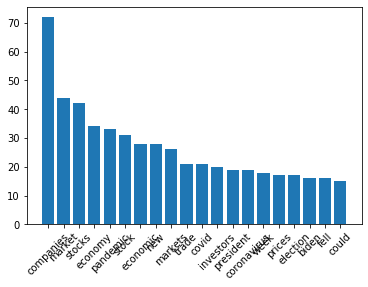

<Figure size 432x288 with 0 Axes>

In [173]:
import matplotlib.pyplot as plt

plt.bar(range(len(newdict)), list(newdict.values()), align='center')
plt.xticks(range(len(newdict)), list(newdict.keys()))
plt.xticks(rotation=45)
plt.show()
plt.savefig('commonwords2.png')

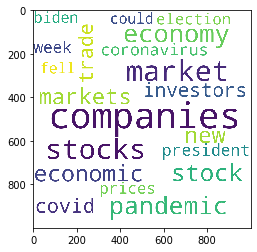

In [162]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(wordfreq)
plt.imshow(wc)
plt.savefig('wordcloud.png')

# Model Implementation

In [161]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

## Model Training

I based the code off of these sources:
* Naive Bayes: https://towardsdatascience.com/sentiment-analysis-introduction-to-naive-bayes-algorithm-96831d77ac91
* AdaBoost and SVC: https://www.datacamp.com/community/tutorials/adaboost-classifier-python 


We probably will need to run GridSearch to determine which parameters fit best for the model

In [ ]:
# split the Sentiment 140 training set with labeled sentiments into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(......., test_size = 0.2, random_state = 5) #change params to fit

In [ ]:
# create and fit the Naive Bayes Classifier
MNB = MultinomialNB()
MNB.fit(X_train, y_train) 

In [ ]:
# create the AdaBoost Classifier (the default base estimator is decision tree)
AB = AdaBoostClassifier(n_estimators = 50, learning_rate = 1)
AB.fit(X_train, y_train)

In [ ]:
# create the AdaBoost Classifier, where the base estimator is SVC (Support Vector Classifier)

svc = SVC(probability = True, kernel = 'linear')

# create and fit the classifier
SVC = AdaBoostClassifier(base_estimator = svc, n_estimators = 50, learning_rate = 1)
SVC.fit(X_train, y_train)

## Model Evaluation

To test different varieties, we could do:
* test different Naive Bayes algorithms (Gaussian and/or Bernoulli NB, along with Multinomial which we're currently using)
* test different AdaBoost algorithms (currently evaluating Decision Trees and Support Vector Classifier)

We could also consider using different BoW implementations to see if it changes our models' performance:
* use CountVectorizer() before any models are implemented, and we rely on the word counts of the features
* after implementing the models, we could then switch over to TD-IDF Vectorizer() and rely on the IDF scores

Metrics to Include for Presentation:
* F1 Score, Precision, Recall, Confusion Matrix?
* Which sentiment we classified most accurately
* after implementing the models, we could then switch over to TD-IDF Vectorizer() and rely on the IDF scores

In [ ]:
# evaluate Naive Bayes

# make predictions on the training set
MNB_predicted = MNB.predict(X_test)

# assess accuracy of the predictions
MNB_acc = accuracy_score(MNB_predicted, y_test)
print(f'Naive Bayes\'s accuracy on training dataset:\t {MNB_acc * 100}+%')

# print the confusion matrix
print(f'Naive Bayes confusion matrix:\n {confusion_matrix(MNB_predicted, y_test)}')

# print the classification report
print(classification_report(MNB_predicted, y_test))

In [ ]:
# evaluate AdaBoost

# make predictions on the training set
AB_predicted = AB.predict(X_test)

# assess accuracy of the predictions
AB_acc = accuracy_score(AB_predicted, y_test)
print(f'AdaBoost\'s accuracy on training dataset:\t {AB_acc * 100}+%')

# print the confusion matrix
print(f'AdaBoost confusion matrix:\n {confusion_matrix(AB_predicted, y_test)}')

# print the classification report
print(classification_report(AB_predicted, y_test))

In [ ]:
# evaluate SVC

# make predictions on the training set
SVC_predicted = SVC.predict(X_test)

# assess accuracy of the predictions
SVC_acc = accuracy_score(SVC_predicted, y_test)
print(f'SVC\'s accuracy on training dataset:\t {SVC_acc * 100}+%')

# print the confusion matrix
print(f'SVC confusion matrix:\n {confusion_matrix(SVC_predicted, y_test)}')

# print the classification report
print(classification_report(SVC_predicted, y_test))

In [1]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical

from keras.models import Model
from keras.layers import (
    Input, 
    Embedding, 
    Conv1D, 
    MaxPool1D, 
    Bidirectional, 
    CuDNNGRU, 
    CuDNNLSTM, 
    SpatialDropout1D, 
    Dropout, 
    Dense, 
    Concatenate, 
    Flatten
)


def cnn(init_layer, kernel_size, params):
    conv_layer = Conv1D(filters=params["filters"], kernel_size=kernel_size, 
                  padding="valid", kernel_initializer=params["conv_init"])(init_layer)
    pool = MaxPool1D(pool_size=params["pool_size"])(conv)
    x = eval(params["conv_activation"])(pool)
    x = Dropout(params["dropout"])(x)
    
    for i in range(params["num_conv"] - 1):
        conv_layer = Conv1D(filters=params["filters"], kernel_size=kernel_size, 
                      padding="valid", kernel_initializer=params["conv_init"])(x)
        pool = MaxPool1D(pool_size=params["pool_size"])(conv_layer)
        x = eval(params["conv_activation"])(pool)
        x = Dropout(params["dropout"])(x)  
    x = Flatten()(x)     
    return x
    

def build_model(params: dict):
    inputs = Input(shape=(params["maxlen"],))
    
    embedding_weights = params["weights"]
    embeddings_layer = Embedding(input_dim=embedding_weights.shape[0], 
                          output_dim=embedding_weights.shape[1], 
                          weights=[embedding_weights], 
                          trainable=False)

    embeddings = embeddings_layer(inputs)

    # Add SpatialDropout1D
    x = SpatialDropout1D(params["spatial_dropout"])(embeddings)

    # Use single CuDNNLSTM layer
    lstm = CuDNNLSTM(params["lstm_state_size"], return_sequences=True)
    x = Bidirectional(lstm)(x)
    
    # CNN
    cnn_layers = []
    for i, ks in enumerate(params["cnn_kernel_sizes"]):
        conv = cnn(x, ks, params)
        cnn_layers.append(conv)
        
    x = Concatenate()(cnn_layers) if len(cnn_layers) > 1 else cnn_layers[0]
    
    # Build fully-connected classifier
    x = Dense(params["dense_1"], activation=params["dense_activation"])(x)
    
    x = Dropout(params["dropout"])(x)
    
    outputs = Dense(params["num_classes"], activation="softmax")(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    lr = params["lr"]
    optimizer = params["optimizer"]
    opt = optimizer(lr=lr)
    
    loss = "binary_crossentropy"
    if params["num_classes"] > 2:
        loss = "categorical_crossentropy"
        
    model.compile(loss=loss, optimizer=opt, metrics=["accuracy"])
    return model


from keras import backend as K
from keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU

params = {
    "maxlen": maxlen,
    "weights": weights,
    "spatial_dropout": 0.2,
    "lstm_state_size": 100,
    "filters": 128,
    "cnn_kernel_sizes": [3, 5, 7],
    "conv_activation": "LeakyReLU(alpha=0.3)", 
    "conv_init": "he_normal",
    "pool_size": 4,
    "num_conv": 2,
    "dropout": 0.5,
    "dense_1": 128,
    "dense_activation": "relu",
    "num_classes": 2,
    "lr": 1e-3,
    "optimizer": RMSprop  # known good optimizer for RNNs
}

K.clear_session()

model = build_model(params)
model.summary()


from keras.models import load_model
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [
    ReduceLROnPlateau(monitor="val_acc",
                     min_delta=0.005,
                     patience=3,
                     factor=0.5),
    EarlyStopping(monitor="val_loss",
                 min_delta=0.005,
                 patience=3,
                 mode="auto",
                 restore_best_weights = True)
]

epochs = 10
batch_size = 256

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                    validation_data=(X_test, y_test), callbacks=callbacks)

In [5]:
#hyperparams, can also alter activation function
max_features = 2000
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

NameError: name 'X' is not defined

In [ ]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size, verbose = 2)